In [1]:
import math
import pypoman
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, uniform, chi2
import numpy as np
from scipy.stats.mstats import gmean
from numpy.testing import assert_allclose
from iteround import saferound
from utils import Bets, Weights, mart, intersection_mart, plot_marts_eta
np.random.seed(123456789)

In [2]:
#to project onto polytope \mathcal{C}
#need the packages 'qpsolvers' and 'quadprog' as well as the dev version of 'pypoman'
#run these:
#pip install --upgrade --force-reinstall git+https://github.com/stephane-caron/pypoman
#pip install qpsolvers
#pip install quadprog
import qpsolvers
print(qpsolvers.available_solvers)

['cvxopt', 'quadprog']


## Betting UI-NNSMs with $\boldsymbol{\eta}$-adaptive and $\boldsymbol{\eta}$-nonadaptive bets

In [10]:
N = np.array([1000, 1000, 1000])
n = [50, 50, 100]
w = N/np.sum(N)
K = 3
eta = np.ones(K)/K

samples = [0.5 * np.ones(n[0]), 0.5 * np.ones(n[1]), 0.6 * np.ones(n[2])]
#samples = [np.random.normal(0.4, .05, n[0]), np.random.normal(0.7, .05, n[1]), np.random.normal(0.7, .05, n[2])]
#samples = [np.random.binomial(1, 0.4, n[0]), np.random.binomial(1, 0.5, n[1]), np.random.binomial(1, 0.7, n[2])]

intersection_mart(x = samples, eta = eta, lam_func = Bets.lam_fixed, combine = "product", log = True)

30.010459245033807

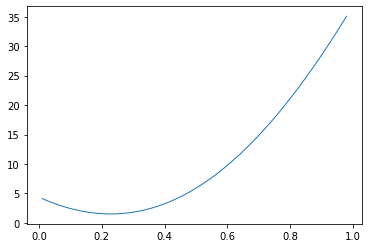

In [14]:
plot_marts_eta(x = samples[1:3], N = N[1:3], lam_func = Bets.lam_smooth, combine = "product", log = True)

In [61]:
#print(global_log_mart(np.array([0.5, 0, 1])))
#print(global_log_mart(np.array([.5, .5, .5])))
t = 0.5
eta_1 = np.array([0.5,0.5,0.5])
eta_2 = np.array([0.6,0.5,0.4])

#not convex :P
print(t * global_log_mart(eta_1) + (1-t) * global_log_mart(eta_2))
print(global_log_mart(t * eta_1 + (1-t) * eta_2))

#original martingale
print(t * global_mart(eta_1) + (1-t) * global_mart(eta_2))
print(global_mart(t * eta_1 + (1-t) * eta_2))

-0.6257825545296356
-0.312597696959239
0.6430283681651799
0.7315441558157696


In [83]:
eta_1 = np.array([0.5])
eta_2 = np.array([0.55])
#this does seem convex...
print(t * mart(eta_1, 0) + (1-t) * mart(eta_2, 0))
print(mart(t * eta_1 + (1-t) * eta_2, 0))

0.5000015895633967
0.001855889647725837


# Two-strata fixed $\lambda$

Suppose $K=2$, $N_1 = N_2$, $\lambda_{ik} = \lambda$, the two-strata are simply point masses at $x_1, x_2 \in [0,1]$, and $n_k = n$. Let $\eta_1 = \eta$ and $\eta_2 = 1 - \eta$. We have:
\begin{align}
M_t(\boldsymbol{\eta}) &= \prod_{k=1}^K \prod_{i=1}^{n_k} [1 + \lambda_{ik} (X_{ik} - \eta_k)] \\ 
&= \prod_{k=1}^2 (1 + \lambda (x_k - \eta_k))^n \\
&= [(1 + \lambda (x_1 - \eta)) (1 + \lambda (x_2 - (1 - \eta)))]^n\\
&= [1 + \lambda x_2 - \lambda - \lambda \eta + \lambda x_1 + \lambda^2 x_1 x_2 - \lambda^2 x_1 - \lambda^2 x_1 \eta_2 - \lambda \eta - \lambda^2 x_2 \eta + \lambda^2 \eta + \lambda^2 \eta^2]^n\\
&= [(1 + \lambda x_2 - \lambda + \lambda x_1 + \lambda^2 x_1 x_2 - \lambda^2 x_1) + (-2 \lambda - \lambda^2 x_1 -\lambda^2 x_2 + \lambda^2) \eta  + \lambda^2 \eta^2 ]^n\\
\end{align}

Assume that $M_t(\boldsymbol{\eta})$ is quasi-concave for any $\lambda_{ik}, x_{ik}, \eta_k \in [0,1]$ (this seems true but remains to be proven; note that log-concave functions are quasi-concave.). Then the minimum occurs on the boundary: $\eta = 1$ or $\eta = 0$. 



#### Example
WLOG assume that the minimum occurs when $\eta = 0$. Then as a function of $n$ we have:
\begin{align}
M_t(\boldsymbol{\eta}) &= (1 - \lambda + (\lambda - \lambda^2) x_1 + \lambda x_2 + \lambda^2 x_1 x_2)^n
\end{align}

Take $\lambda = 1$, then $M_t^* = (x_1 + x_1 x_2)^n$; this grows as a function of $n$ only if $x_1 + x_1 x_2 > 1$ while the global alternative is true as long as $x_1 + x_2 > 1$. Take, for example, $x_1 = 0.6$ and $x_2 = 0.5$ then the global alternative is true, but $0.6 + 0.5 * 0.6 = 0.9 < 1$, so the martingale shrinks as a function of $n$ and the $P$-value increases.  


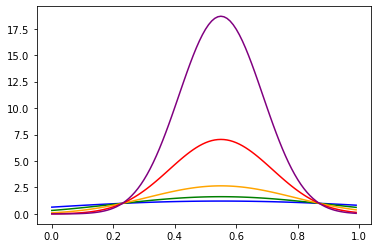

In [171]:
#for plotting when x_1 = x_2 = 0.5 and \lambda = 0.5
eta_grid = eta_grid = np.arange(0,1,step=1e-2)
#obj_val = lambda eta, n: (0.95 + 0.25*eta - 0.25*eta**2)**n

#case where alternative is true
obj_val = lambda eta, n: ((1 + 1 * (.6 - eta)) * (1 + 1 * (.5 - (1-eta))))**n
plt.plot(eta_grid, obj_val(eta = eta_grid, n = 2), color = 'blue')
plt.plot(eta_grid, obj_val(eta = eta_grid, n = 5), color = 'green')
plt.plot(eta_grid, obj_val(eta = eta_grid, n = 10), color = 'orange')
plt.plot(eta_grid, obj_val(eta = eta_grid, n = 20), color = 'red')
plt.plot(eta_grid, obj_val(eta = eta_grid, n = 30), color = 'purple')
plt.show()